# Linear Programme

Example: Basic Linear Programme

A company receives in sales 20 per book & 18 per calculator.
The cose per unit to manufacture each book and calculator are 5 and 4, respectively.
The monthly (30 day) cost must not exceed $27,000 / month.
It takes 5 minutes to produce a book and 15 minutes to produce a calculator.

How many unit should be produced of books and calculators to maximise sales and profit.

From this problem we must determine all variables and constraints:

Sales

Book = 20,
Calculator = 18

S = 20b + 18c

Cost <= $27,000 / month:

Book = 5, 
Calculator = 4

5b + 4c <= 27,000

Time to produce:

Minutes in a month (30 days)
30(24*60) = 43,200 minutes

Book = 5 minutes,
Calculator 15 minutes

5b + 15c <= 43,200

Thus this is now the problem to solve:

Maximise S = 20b + 18c

s.t 
   5b + 4x <= 27,000,
   5b + 15c <= 43,200

In order to solve this, vector points for both variable constraints must be plotted in order to determine the feasible region of the optimisation.

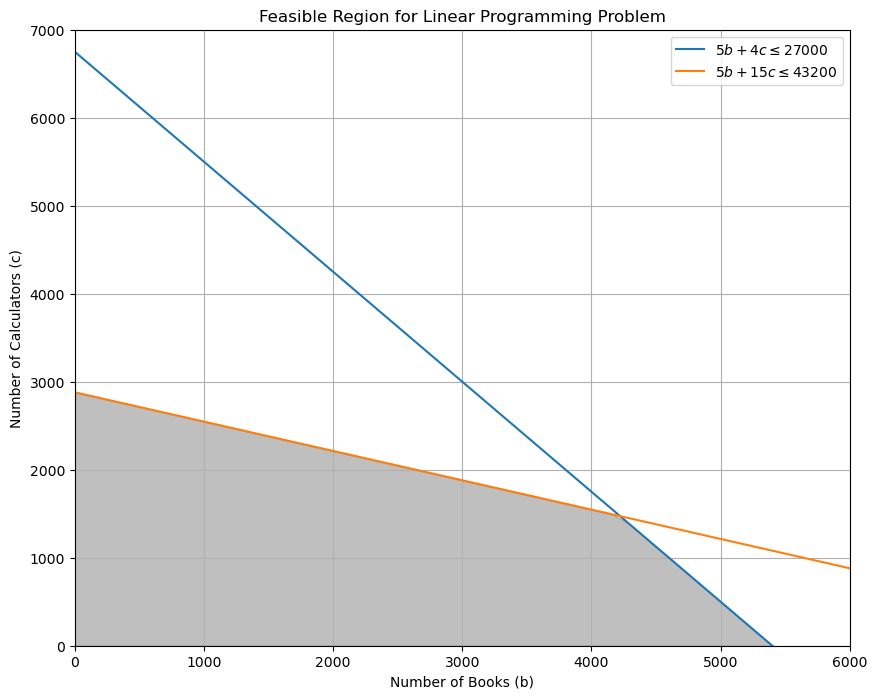

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the range for b (books) and c (calculators)
b = np.linspace(0, 6000)
c1 = (27000 - 5 * b) / 4
c2 = (43200 - 5 * b) / 15

# Feasible region constraints
plt.figure(figsize=(10, 8))
plt.plot(b, c1, label=r'$5b + 4c \leq 27000$')
plt.plot(b, c2, label=r'$5b + 15c \leq 43200$')

# Fill the feasible region
plt.fill_between(b, np.minimum(c1, c2), where=(c1 >= 0) & (c2 >= 0), color='gray', alpha=0.5)

# Plot settings
plt.xlim((0, 6000))
plt.ylim((0, 7000))
plt.xlabel('Number of Books (b)')
plt.ylabel('Number of Calculators (c)')
plt.legend()
plt.title('Feasible Region for Linear Programming Problem')
plt.grid(True)

# Show plot
plt.show()

To solve for the maximum vector of sales (in terms of b, c), we would have to find common multiples of both constraints and deduct either or to solve for one variables (c or b) and then use results to solve for the other and that would give us the optimal points.

We will round any values since we want integers for our answers. 

5b + 4c <= 27,000

5b + 15c <= 43,200

5b is already in common thus:
5b + 15c <= 43,200 

- 

5b + 4c <= 27,000 

=

11c <= 16,00
c <= (16,200 / 11) <= 1473

Now plugging 1473 into 5b + 4(1473) <= 27,000

5b + 5892 <= 27,000
b <= 4221

Thus our vector for maximising sales is:

S = (4221, 1473) as shown by graph.

Thus from this we can plug these values back into the objective function to determine sales and use the fixed value of cost at 27,000 to determine profits. 

20(4221) + 18(1473) = $110934 / month

110934 - 27000 = $83,934 / month

#### Here is an algorithm to solve this problem alternatively

In [2]:
# Mixed Integer Linear Problem

import pulp

# Define the problem
problem = pulp.LpProblem("Maximize_Sales", pulp.LpMaximize)

# Define the decision variables with integer constraints
b = pulp.LpVariable('b', lowBound=0, cat='Integer')
c = pulp.LpVariable('c', lowBound=0, cat='Integer')

# Define the objective function
problem += 20 * b + 18 * c, "Total Sales"

# Define the constraints
problem += 5 * b + 4 * c <= 27000, "Cost Constraint"
problem += 5 * b + 15 * c <= 43200, "Time Constraint"

# Solve the problem
status = problem.solve()

# Output the results
if pulp.LpStatus[status] == 'Optimal':
    print(f"Optimal value (Maximum Sales): {pulp.value(problem.objective)}")
    print(f"Number of books (b): {pulp.value(b)}")
    print(f"Number of calculators (c): {pulp.value(c)}")
    print(f"Maximum Profit: {pulp.value(problem.objective) - 27000}") 
else:
    print("No optimal solution found")

Optimal value (Maximum Sales): 110940.0
Number of books (b): 4224.0
Number of calculators (c): 1470.0
Maximum Profit: 83940.0


In [3]:
# Non Integer Linear Programme

from scipy.optimize import linprog
c = [-20, -18]
a = [[5, 4], [5, 15]]
b = [27000, 43200]
bound = (0, None)

sol = linprog(c, A_ub=a, b_ub=b, bounds=[bound, bound], method='highs') 

print(f"Maximum Proft: {-sol.fun}")
print(f"Optimal Solutions: Books = {sol.x[0]}, Calculators = {sol.x[1]}")

Maximum Proft: 110945.45454545456
Optimal Solutions: Books = 4221.818181818182, Calculators = 1472.7272727272727


In [4]:
from gekko import GEKKO

m = GEKKO()
b,c= m.Array(m.Var, 2,lb=0)
m.Maximize(20*b + 18*c)
m.Equation(5*b + 4*c <= 27000)
m.Equation(5*b + 15*c <= 43200)
m.solve(disp=False)

print(f"Optimal Solutions: B = {b.value[0]}, C = {c.value[0]}")
print(f"Maximum Profit: {-m.options.objfcnval}")

Optimal Solutions: B = 4221.8181818, C = 1472.7272727
Maximum Profit: 110945.45455


As we can see here, there is more precision from this algorithm as these values add up exactly to 27,000 for the cost constraint and to 43,200 for the time constraint. 

# Quadratic Programme

Example: Basic Quadratic Programme

$\begin{align}\mathrm{maximize} \quad & \frac{1}{2} \left(x^2+y^2\right) -2x+2y \\ \mathrm{subject\;to}\quad & 6x+4y\le24 \\ & x+2y\le6 \\ &-x+y\le1 \\ & 0\le y\le2 \\ & x\ge0 \end{align}$

In [5]:
from gekko import GEKKO

In [6]:
m = GEKKO()
x, y = m.Array(m.Var,2, lb=0)
m.Maximize(0.5 * (x**2 + y**2) - 2*x + 2*y)
m.Equation([6*x + 4*y <=24, x + 2*y <6, y-x<=1, 0<=y, y<= 2, x>=0])
m.solve(disp=False)
xopt = x.value[0]
yopt = y.value[0]        
print(f"Optimal Solutions: x = {xopt}, y = {yopt}")
print(f"Maximum Value: {m.options.OBJFCNVAL}")  

Optimal Solutions: x = 0.99999999792, y = 2.0000000075
Maximum Value: -4.5000000321


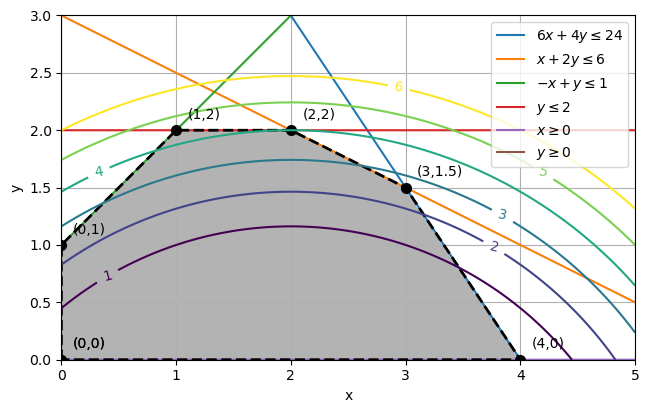

In [7]:
# visualize solution
g = np.linspace(0,5,200)
x,y = np.meshgrid(g,g)
obj = 0.5*(x**2+y**2)-2*x+2*y
plt.imshow(((6*x+4*y<=24)&(x+2*y<=6)&(-x+y<=1)&(y<=2)&(x>=0)&(y>=0)).astype(int), 
    extent=(x.min(),x.max(),y.min(),y.max()),origin='lower',cmap='Greys',alpha=0.3);
# plot constraints
x0 = np.linspace(0, 5, 2000)
y0 = 6-1.5*x0   # 6*x+4*y<=24
y1 = 3-0.5*x0   # x+2*y<=6
y2 = 1+x0       # -x+y<=1
y3 = (x0*0) + 2 # y <= 2
y4 = x0*0       # x >= 0
plt.plot(x0, y0, label=r'$6x+4y\leq24$')
plt.plot(x0, y1, label=r'$x+2y\leq6$')
plt.plot(x0, y2, label=r'$-x+y\leq1$')
plt.plot(x0, 2*np.ones_like(x0), label=r'$y\leq2$')
plt.plot(x0, y4, label=r'$x\geq0$')
plt.plot([0,0],[0,3], label=r'$y\geq0$')
xv = [0,0,1,2,3,4,0]; yv = [0,1,2,2,1.5,0,0]
plt.plot(xv,yv,'ko--',markersize=7,linewidth=2)
for i in range(len(xv)):
    plt.text(xv[i]+0.1,yv[i]+0.1,f'({xv[i]},{yv[i]})')
# objective contours
CS = plt.contour(x,y,obj,np.arange(1,7))
plt.clabel(CS, inline=1, fontsize=10)
plt.xlim(0,5); plt.ylim(0,3); plt.grid(); plt.tight_layout()
plt.legend(loc=1); plt.xlabel('x'); plt.ylabel('y')
plt.show()

## Reason to be cautious with a linear algorithm in context to this project.

Linear programming (LP) models can exhibit biases, particularly when the objective is to maximise returns without directly considering risk, leading to highly concentrated portfolios. This behavior stems from the LP model's focus on a linear objective function that does not account for the covariance between assets, unlike quadratic programming (QP) models.

Reasons for Bias in Linear Programming:

Objective Function: LP maximises returns without inherently considering risk, leading to heavy investments in high-return assets.

Constraints: Without additional constraints or considerations for diversification, LP may allocate all weights to the assets with the highest expected returns that meet the target return.

Comparison to Quadratic Programming:

Quadratic Programming: Minimises portfolio variance by incorporating the covariance matrix, inherently promoting diversification and risk management.

Linear Programming: Without additional risk controls, it tends to favor assets with the highest returns, leading to potential over-concentration.

Addressing Bias in Linear Programming: To mitigate this bias, you can introduce additional constraints or modify the objective function to account for risk, such as:

Adding Diversification Constraints: Limit the maximum weight any single asset can have, ensuring a more balanced portfolio.

Risk Measures: Introduce constraints or multi-objective optimisation to balance return and risk, even within a linear framework.

With this in mind I want to run a linear programme that will have a linearised approximation of risk and compare that to the quadratic programme with the exact same constraints to have controls for my comparison between the objective functions of both models as they are the fundamental differences to what makes a programme linear or quadratic.

# S&P 500 Data Collection

I collected data from the S&P in the periods 2000 - 2015, daily intervals. I cleaned the data in an excel sheet, dropping the stocks that caused problems with the linear programme due to having majority '0' values.

In [51]:
import pandas as pd

# Load the cleaned data from the Excel file
file_path = 'sp500_cleaned.xlsx'
data = pd.read_excel(file_path, index_col=0)

returns = data

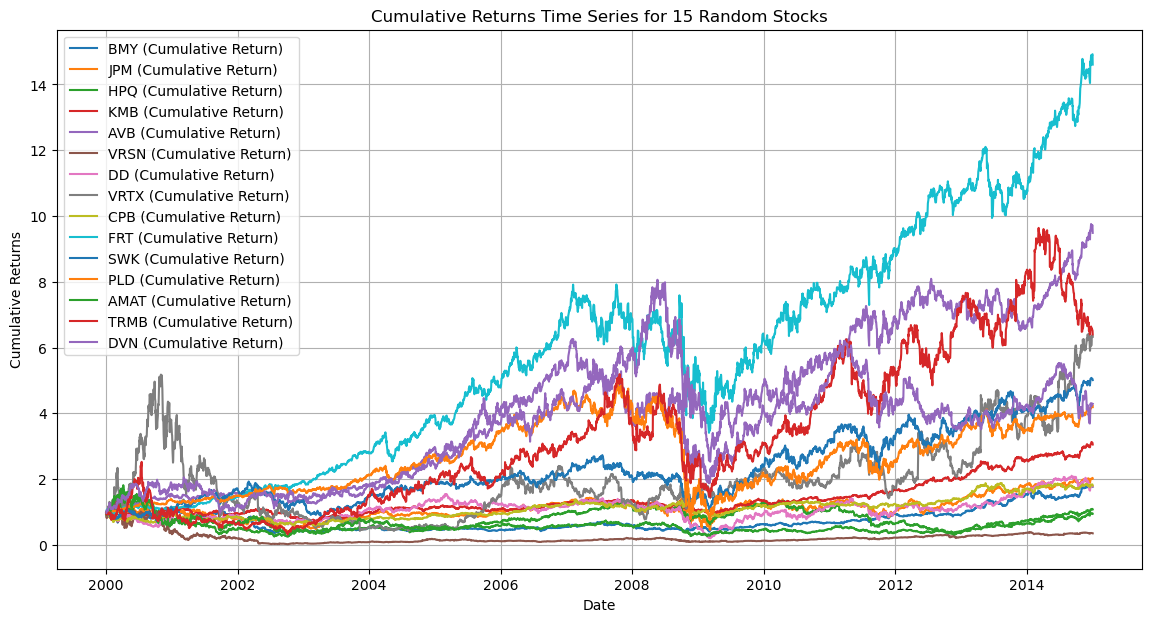

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Set the random seed for reproducibility
random.seed(1004932043)

# Select 10 random stocks from the portfolio
random_stocks = random.sample(list(data.columns), 15)

# Calculate cumulative returns for the selected stocks
cumulative_returns = (1 + data[random_stocks]).cumprod()

# Plot cumulative returns for the 10 random stocks
plt.figure(figsize=(14, 7))
for stock in random_stocks:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=f'{stock} (Cumulative Return)')

plt.title('Cumulative Returns Time Series for 15 Random Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("CR_TS_SP")
plt.show()

# Linear & Quadratic Programme For Stock Returns

#### Optimisation Notation
Stocks = i

Weights = W_i

t = 3772 # No. of intervals
#### Objective Function:
Minimise α * W_i * (∑_j|R_ij) / t  - μ_i |- (1 - α)  * (E[R]_i * W_i)
​

#### Subject to:

Σ(W_i) = 1

W_i >= 0

Calculate mean returns and mean absolute deviations.

In [53]:
import numpy as np

In [54]:
mean_returns = np.mean(returns,axis=0)

print(mean_returns)

A       0.000411
AAPL    0.001304
ABT     0.000496
ACGL    0.000862
ADBE    0.000849
          ...   
WY      0.000261
XEL     0.000533
XOM     0.000450
YUM     0.000778
ZBRA    0.000570
Length: 352, dtype: float64


In [55]:
abs_dev = np.abs(returns - mean_returns)

abs_dev_mean = np.mean(abs_dev,axis=0)

print(abs_dev_mean)

A       0.019308
AAPL    0.018975
ABT     0.010642
ACGL    0.010660
ADBE    0.019735
          ...   
WY      0.015381
XEL     0.010303
XOM     0.011039
YUM     0.013142
ZBRA    0.015415
Length: 352, dtype: float64


In [56]:
import cvxpy as cp
import time

# Define the weights as decision variables
weights = cp.Variable(returns.shape[1])

# Define the expected returns
expected_returns = mean_returns

# Balancing parameter between returns and risk
alpha = 0.5

# Objective function: Minimise the sum of absolute deviations, maximise returns.
objective = cp.Minimize(alpha * cp.matmul(abs_dev_mean, weights) - (1 - alpha) * cp.matmul(expected_returns, weights))

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1
    weights >= 0,  # Weights must be non-negative
]

# Problem setup
problem = cp.Problem(objective, constraints)

# Solve the problem and measure computational time
start_time = time.time()
problem.solve(solver=cp.SCS)
end_time = time.time()

# Output the optimised weights
lp_optimal_weights = weights.value

optimised_weight_threshold = 0.0001

# Initialise an empty dictionary
lp_portfolio = {}

# Populate the dictionary with stock and weight pairs
for stock, weight in zip(data.columns, lp_optimal_weights):
    if weight > optimised_weight_threshold:  # Only include stocks with non-zero weight
        lp_portfolio[stock] = weight

# Normalise the filtered weights to sum to 1
total_weight = sum(lp_portfolio.values())
lp_portfolio = {k: v / total_weight for k, v in lp_portfolio.items()}

# Display computational rigour and time taken
computation_time = end_time - start_time
print(f"Computational Time: {computation_time:.4f} seconds")
print(f"Solver Status: {problem.status}")

# Filter the weights and corresponding stock names
lp_filtered_weights = [w for w in lp_optimal_weights if w > optimised_weight_threshold]
lp_filtered_names = [data.columns[i] for i in range(len(lp_optimal_weights)) if lp_optimal_weights[i] > optimised_weight_threshold]

# Normalise the filtered weights to sum to 1
total_weight = sum(lp_filtered_weights)
lp_filtered_weights = [w / total_weight for w in lp_filtered_weights]

print(f"\nOptimal Portfolio")
print(f"\n{lp_filtered_names}")
print(lp_filtered_weights)

Computational Time: 0.0121 seconds
Solver Status: optimal

Optimal Portfolio

['ED']
[1.0]


In [57]:
np.mean(returns)

0.0007058953525871033

In [58]:
# Filter the weights and corresponding stock names
lp_filtered_weights = [w for w in lp_optimal_weights if w > optimised_weight_threshold]
lp_filtered_names = [data.columns[i] for i in range(len(lp_optimal_weights)) if lp_optimal_weights[i] > optimised_weight_threshold]

# Normalise the filtered weights to sum to 1
total_weight = sum(lp_filtered_weights)
lp_filtered_weights = [w / total_weight for w in lp_filtered_weights]

print(f"\nOptimal Portfolio")
print(f"\n{lp_filtered_weights}")
print(lp_filtered_names)


Optimal Portfolio

[1.0]
['ED']


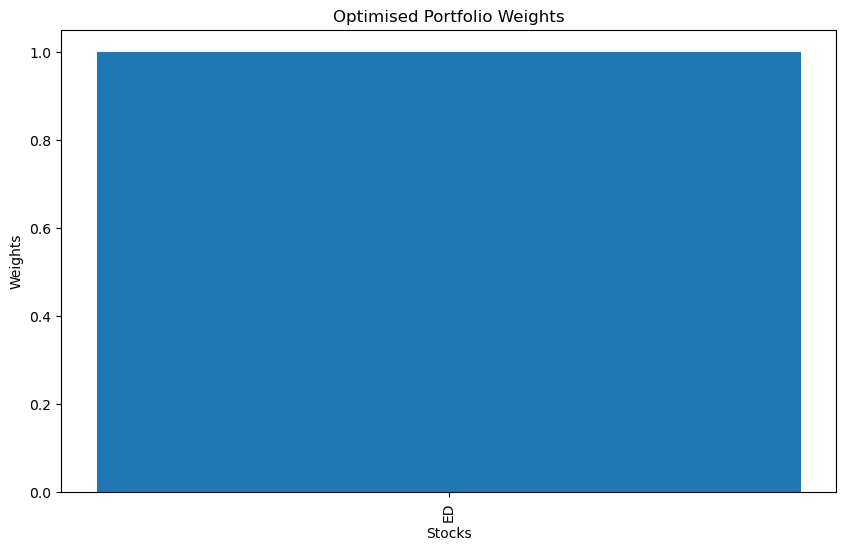

In [59]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(lp_filtered_weights)), lp_filtered_weights)
plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Optimised Portfolio Weights')
plt.xticks(range(len(lp_filtered_weights)), lp_filtered_names, rotation=90)
plt.savefig("LP_portfolio")
plt.show()

In [60]:
# Function to calculate portfolio returns
def calculate_portfolio_returns(weights, returns):
    return returns.dot(weights)

# Calculate portfolio returns
lp_portfolio_returns = calculate_portfolio_returns(lp_optimal_weights, returns)   

In [61]:
num_stocks = len(lp_filtered_names)
print(f"Number of stocks in the portfolio: {num_stocks}")

Number of stocks in the portfolio: 1


# Quadratic Model

### Optimisation Notation
Let 𝑁 be the number of stocks. 
Let W_𝑖 be the weight of stock i in the portfolio.
Let Σ be the covariance matrix of stock returns, where Σ𝑖𝑗 represents the covariance between the returns of stock and stock 𝑗.

#### Objective Function

Minimize the portfolio variance, which is given by:

Minimize α * wTΣw - (1 - α) * E[R]

where 𝑤 is the vector of weights.

#### Subject to

Σ(W_i) = 1

W_i >= 0

In [62]:
# Calculate the covariance matrix of returns
cov_matrix = np.cov(returns.T)

In [63]:
import cvxpy as cp
import numpy as np
import time

# Define the weights as decision variables
weights = cp.Variable(returns.shape[1])

# Define the expected returns
expected_returns = mean_returns

# Balancing parameter between returns and risk
alpha = 0.5

# Objective function: Minimize portfolio variance and maximize returns
objective = cp.Minimize(alpha * cp.quad_form(weights, cov_matrix) - (1 - alpha) * cp.matmul(expected_returns, weights))

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1
    weights >= 0,  # Weights must be non-negative
]

# Problem setup
problem = cp.Problem(objective, constraints)

# Solve the problem and measure computational time
start_time = time.time()
problem.solve(solver=cp.SCS)
end_time = time.time()

# Output the optimized weights
qp_optimal_weights = weights.value

optimised_weight_threshold = 0.0001

# Initialize an empty dictionary
qp_portfolio = {}

# Populate the dictionary with stock and weight pairs
for stock, weight in zip(data.columns, qp_optimal_weights):
    if weight > optimised_weight_threshold:  # Only include stocks with non-zero weight
        qp_portfolio[stock] = weight

# Normalize the filtered weights to sum to 1
total_weight = sum(qp_portfolio.values())
qp_portfolio = {k: v / total_weight for k, v in qp_portfolio.items()}

# Display computational rigour and time taken
computation_time = end_time - start_time
print(f"Computational Time: {computation_time:.4f} seconds")
print(f"Solver Status: {problem.status}")

# Filter the weights and corresponding stock names
qp_filtered_weights = [w for w in qp_optimal_weights if w > optimised_weight_threshold]
qp_filtered_names = [data.columns[i] for i in range(len(qp_optimal_weights)) if qp_optimal_weights[i] > optimised_weight_threshold]

# Normalise the filtered weights to sum to 1
total_weight = sum(qp_filtered_weights)
qp_filtered_weights = [w / total_weight for w in qp_filtered_weights]

print(f"\nOptimal Portfolio")
print(f"\n{qp_filtered_names}")
print(qp_filtered_weights)

Computational Time: 0.1021 seconds
Solver Status: optimal

Optimal Portfolio

['DECK', 'DVA', 'GILD', 'KMX', 'ODFL', 'REGN', 'TSCO', 'TYL', 'WDC']
[0.2410671128692348, 0.06897302790746129, 0.10645888541733681, 0.10056997949090819, 0.09808834004427508, 0.10939225739887021, 0.18739432653447274, 0.0062421962437142564, 0.08181387409372673]


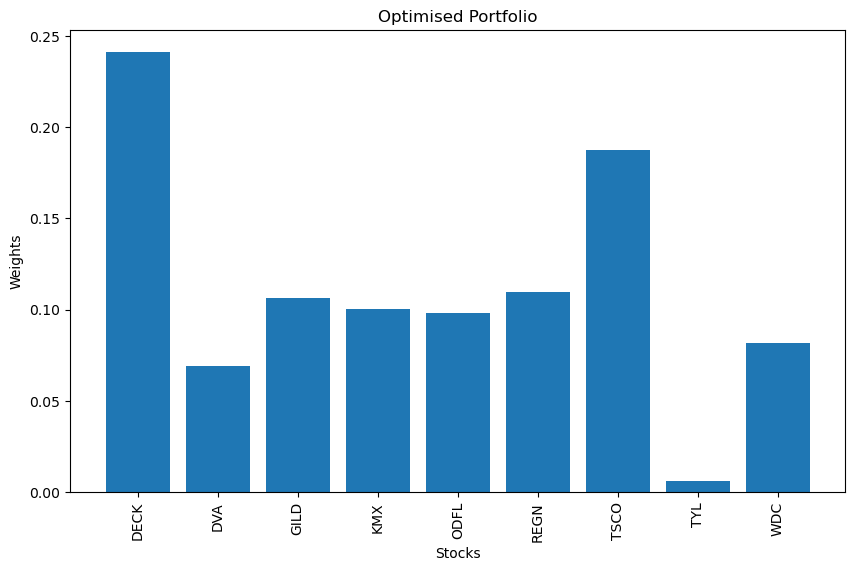

In [64]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(qp_filtered_weights)), qp_filtered_weights)
plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Optimised Portfolio')
plt.xticks(range(len(qp_filtered_weights)), qp_filtered_names, rotation=90)
plt.savefig("Q_portfolio")
plt.show()

In [65]:
# Function to calculate portfolio returns
def calculate_portfolio_returns(weights, returns):
    return returns.dot(weights)

# Calculate portfolio returns
qp_portfolio_returns = calculate_portfolio_returns(qp_optimal_weights, returns)

In [66]:
num_stocks = len(qp_filtered_names)
print(f"Number of stocks in the portfolio: {num_stocks}")

Number of stocks in the portfolio: 9


## Time-Series of Both Optimised Portofolios' Cumulative Returns.

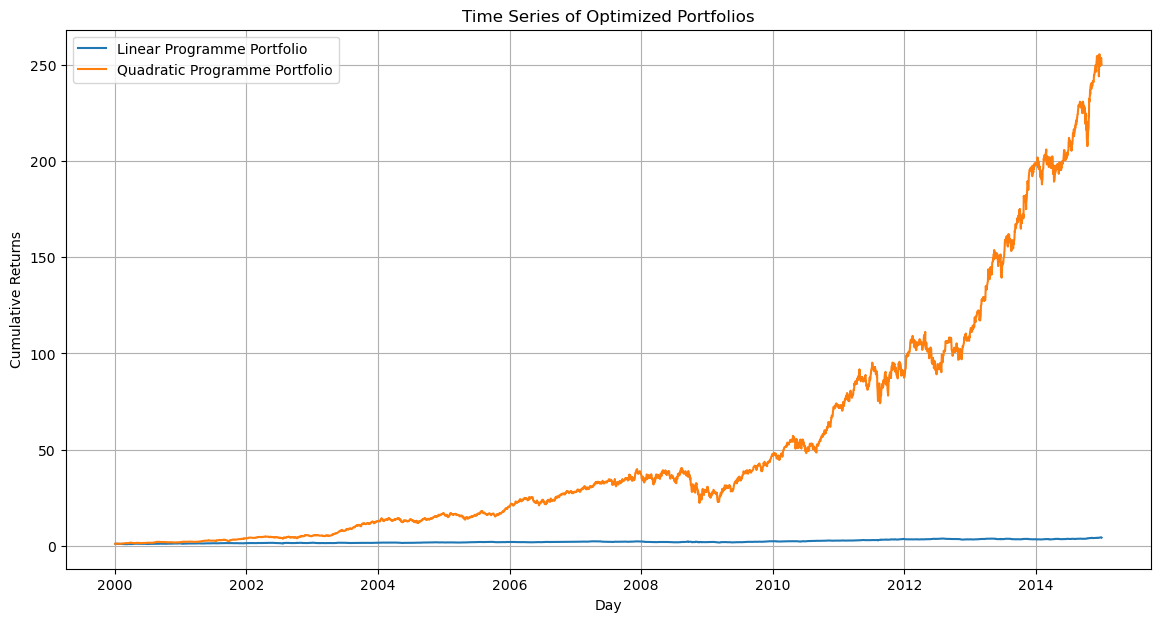

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert the returns to cumulative returns
lp_cumulative_returns = (1 + lp_portfolio_returns).cumprod()
qp_cumulative_returns = (1 + qp_portfolio_returns).cumprod()

# Plot the time series of both portfolios
plt.figure(figsize=(14, 7))
plt.plot(lp_cumulative_returns.index, lp_cumulative_returns, label='Linear Programme Portfolio')
plt.plot(qp_cumulative_returns.index, qp_cumulative_returns, label='Quadratic Programme Portfolio')
plt.title('Time Series of Optimized Portfolios')
plt.xlabel('Day')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("CR_TS_portfolio")
plt.show()

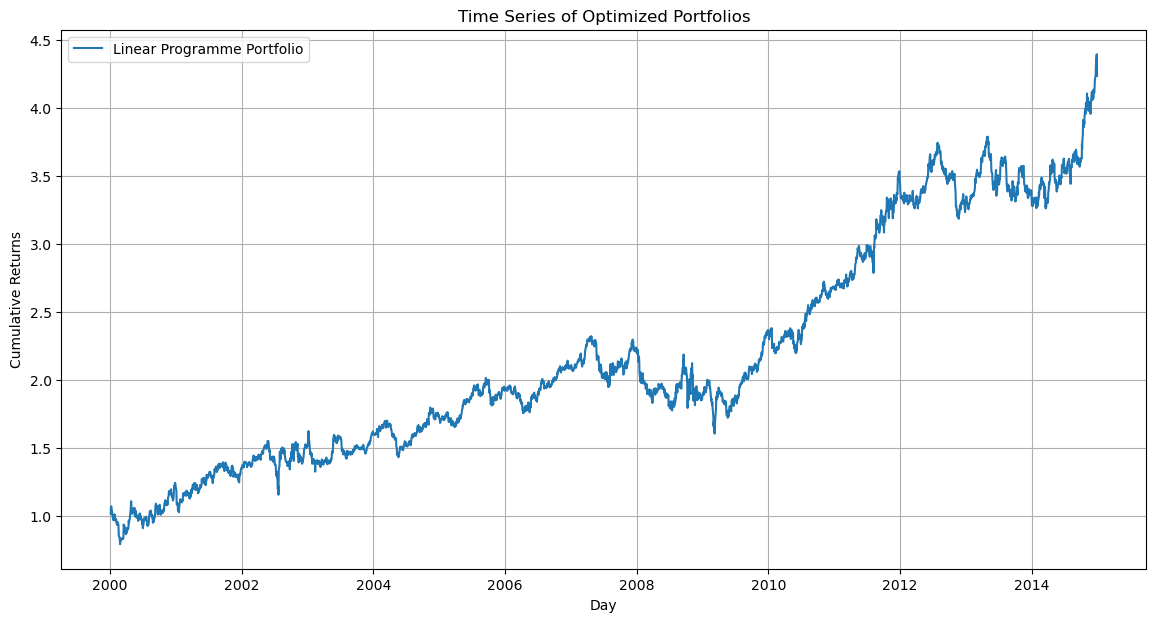

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert the returns to cumulative returns
lp_cumulative_returns = (1 + lp_portfolio_returns).cumprod()

# Plot the time series of both portfolios
plt.figure(figsize=(14, 7))
plt.plot(lp_cumulative_returns.index, lp_cumulative_returns, label='Linear Programme Portfolio')
plt.title('Time Series of Optimized Portfolios')
plt.xlabel('Day')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("LP_CR_TS")
plt.show()

## Time-Series of Both Optimised Portofolios' Returns.

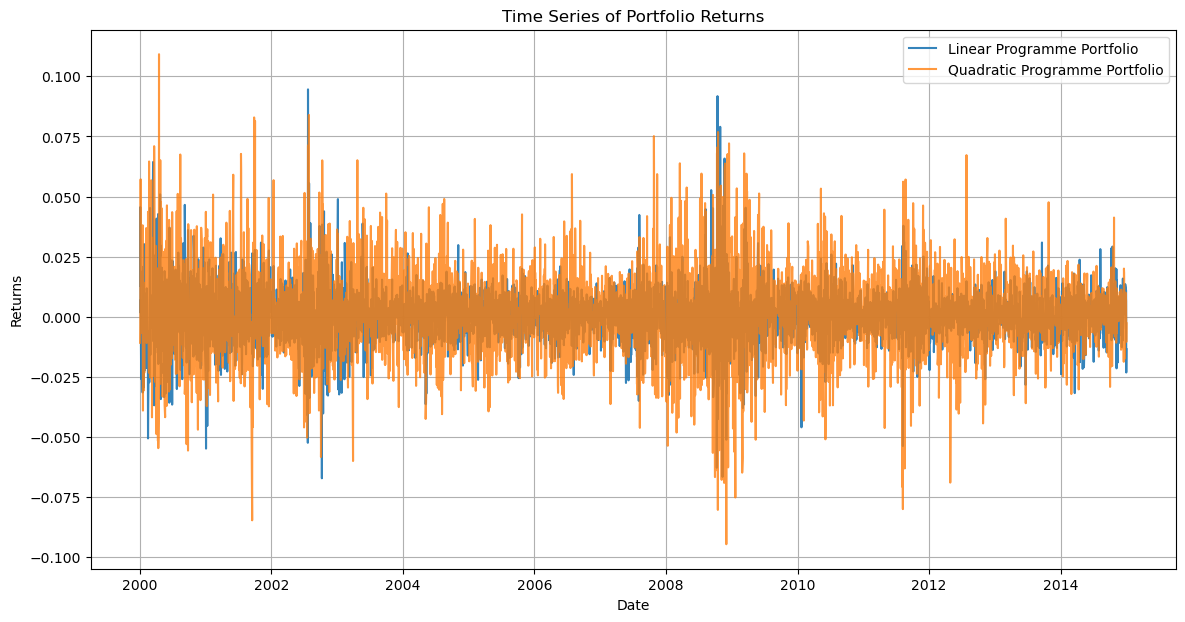

In [69]:
# Plot the returns of both portfolios over time
plt.figure(figsize=(14, 7))
plt.plot(returns.index, lp_portfolio_returns, label='Linear Programme Portfolio', alpha = 0.9)
plt.plot(returns.index, qp_portfolio_returns, label='Quadratic Programme Portfolio', alpha=0.8)
plt.title('Time Series of Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.savefig("R_TS_portfolio")
plt.show()

In [70]:
MLR = np.mean(lp_portfolio_returns)
MQR = np.mean(qp_portfolio_returns)

# Format the variances to avoid scientific notation
formatted_MLR = "{:.10f}".format(MLR)
formatted_MQR = "{:.10f}".format(MQR)

print(f"Mean Returns of Linear Portfolio: {formatted_MLR} \nMean Returns of Quadratic Portfolio: {formatted_MQR}")

if MQR > MLR:
    print("The Mean Returns of the Quadratic Portfolio are greater than the Linear Portfolio")
elif MLR > MQR:
    print("The Mean Returns of the Linear Portfolio are greater than the Quadratic Portfolio")
else:
    print("The Mean Returns of both Portfolios are identical")    

Mean Returns of Linear Portfolio: 0.0004511053 
Mean Returns of Quadratic Portfolio: 0.0016370732
The Mean Returns of the Quadratic Portfolio are greater than the Linear Portfolio


In [71]:
LPVAR = np.var(lp_portfolio_returns)
QPVAR = np.var(qp_portfolio_returns)

# Format the variances to avoid scientific notation
formatted_LPVAR = "{:.10f}".format(LPVAR)
formatted_QPVAR = "{:.10f}".format(QPVAR)

print(f"Variance of Linear Portfolio Returns: {formatted_LPVAR}")
print(f"Variance of Quadratic Portfolio Returns: {formatted_QPVAR}")

if QPVAR > LPVAR:
    print("The Variance of the Quadratic Portfolio is greater than the Linear Portfolio")
elif LPVAR > QPVAR:
    print("The Variance of the Linear Portfolio is greater than the Quadratic Portfolio")
else:
    print("The Variances of both Portfolios are identical")  

Variance of Linear Portfolio Returns: 0.0001370330
Variance of Quadratic Portfolio Returns: 0.0003444271
The Variance of the Quadratic Portfolio is greater than the Linear Portfolio


# There are some interesting results when alpha = 0 however. 

In [72]:
import cvxpy as cp
import time

# Define the weights as decision variables
weights = cp.Variable(returns.shape[1])

# Define the expected returns
expected_returns = mean_returns

# Balancing parameter between returns and risk
alpha = 0

# Objective function: Minimise the sum of absolute deviations, maximise returns.
objective = cp.Minimize(alpha * cp.matmul(abs_dev_mean, weights) - (1 - alpha) * cp.matmul(expected_returns, weights))

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1
    weights >= 0,  # Weights must be non-negative
]

# Problem setup
problem = cp.Problem(objective, constraints)

# Solve the problem and measure computational time
start_time = time.time()
problem.solve(solver=cp.SCS)
end_time = time.time()

# Output the optimised weights
lp_optimal_weights = weights.value

optimised_weight_threshold = 0.0001

# Initialise an empty dictionary
lp_portfolio = {}

# Populate the dictionary with stock and weight pairs
for stock, weight in zip(data.columns, lp_optimal_weights):
    if weight > optimised_weight_threshold:  # Only include stocks with non-zero weight
        lp_portfolio[stock] = weight

# Normalise the filtered weights to sum to 1
total_weight = sum(lp_portfolio.values())
lp_portfolio = {k: v / total_weight for k, v in lp_portfolio.items()}

# Display computational rigour and time taken
computation_time = end_time - start_time
print(f"Computational Time: {computation_time:.4f} seconds")
print(f"Solver Status: {problem.status}")

# Filter the weights and corresponding stock names
lp_filtered_weights = [w for w in lp_optimal_weights if w > optimised_weight_threshold]
lp_filtered_names = [data.columns[i] for i in range(len(lp_optimal_weights)) if lp_optimal_weights[i] > optimised_weight_threshold]

# Normalise the filtered weights to sum to 1
total_weight = sum(lp_filtered_weights)
lp_filtered_weights = [w / total_weight for w in lp_filtered_weights]

print(f"\nOptimal Portfolio")
print(f"\n{lp_filtered_names}")
print(lp_filtered_weights)

Computational Time: 0.0111 seconds
Solver Status: optimal

Optimal Portfolio

['DECK']
[1.0]


In [73]:
# Function to calculate portfolio returns
def calculate_portfolio_returns(weights, returns):
    return returns.dot(weights)

# Calculate portfolio returns
lp_portfolio_returns = calculate_portfolio_returns(lp_optimal_weights, returns)

In [74]:
import cvxpy as cp
import numpy as np
import time

# Define the weights as decision variables
weights = cp.Variable(returns.shape[1])

# Define the expected returns
expected_returns = mean_returns

# Balancing parameter between returns and risk
alpha = 0

# Objective function: Minimize portfolio variance and maximize returns
objective = cp.Minimize(alpha * cp.quad_form(weights, cov_matrix) - (1 - alpha) * cp.matmul(expected_returns, weights))

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1
    weights >= 0,  # Weights must be non-negative
]

# Problem setup
problem = cp.Problem(objective, constraints)

# Solve the problem and measure computational time
start_time = time.time()
problem.solve(solver=cp.SCS)
end_time = time.time()

# Output the optimized weights
qp_optimal_weights = weights.value

optimised_weight_threshold = 0.0001

# Initialize an empty dictionary
qp_portfolio = {}

# Populate the dictionary with stock and weight pairs
for stock, weight in zip(data.columns, qp_optimal_weights):
    if weight > optimised_weight_threshold:  # Only include stocks with non-zero weight
        qp_portfolio[stock] = weight

# Normalize the filtered weights to sum to 1
total_weight = sum(qp_portfolio.values())
qp_portfolio = {k: v / total_weight for k, v in qp_portfolio.items()}

# Display computational rigour and time taken
computation_time = end_time - start_time
print(f"Computational Time: {computation_time:.4f} seconds")
print(f"Solver Status: {problem.status}")

# Filter the weights and corresponding stock names
qp_filtered_weights = [w for w in qp_optimal_weights if w > optimised_weight_threshold]
qp_filtered_names = [data.columns[i] for i in range(len(qp_optimal_weights)) if qp_optimal_weights[i] > optimised_weight_threshold]

# Normalise the filtered weights to sum to 1
total_weight = sum(qp_filtered_weights)
qp_filtered_weights = [w / total_weight for w in qp_filtered_weights]

print(f"\nOptimal Portfolio")
print(f"\n{qp_filtered_names}")
print(qp_filtered_weights)

Computational Time: 0.0414 seconds
Solver Status: optimal

Optimal Portfolio

['DECK']
[1.0]


In [75]:
# Function to calculate portfolio returns
def calculate_portfolio_returns(weights, returns):
    return returns.dot(weights)

# Calculate portfolio returns
qp_portfolio_returns = calculate_portfolio_returns(qp_optimal_weights, returns)

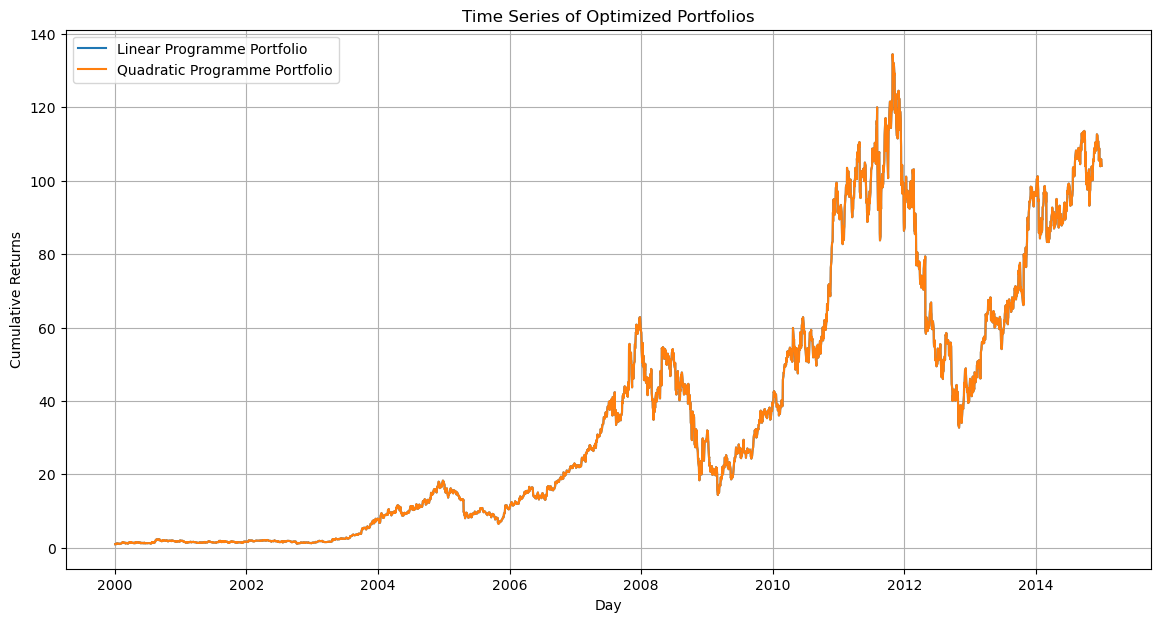

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Convert the returns to cumulative returns
lp_cumulative_returns = (1 + lp_portfolio_returns).cumprod()
qp_cumulative_returns = (1 + qp_portfolio_returns).cumprod()

# Plot the time series of both portfolios
plt.figure(figsize=(14, 7))
plt.plot(lp_cumulative_returns.index, lp_cumulative_returns, label='Linear Programme Portfolio')
plt.plot(qp_cumulative_returns.index, qp_cumulative_returns, label='Quadratic Programme Portfolio')
plt.title('Time Series of Optimized Portfolios')
plt.xlabel('Day')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("CR_TS_0portfolio")
plt.show()

## Both portfolios are identical and determine stock 'MNST' to be the stock with the highest returns out of all stocks. 

Now I will analyse how the optimised portfolios will perform with a smaller time frame, to determine the performances in the short run where risk is a much more important factor. I will reduce my number of days to 1 trading year (252 days).

# Test Of Models In Short Run (1 Trading Year, 252 days)

In [77]:
import pandas as pd

# Load the cleaned data from the Excel file
file_path = 'sp500_cleaned.xlsx'
data = pd.read_excel(file_path, index_col=0)

# Slice the data to include only the first 252 rows
data = data.iloc[:252]

# Assign to returns variable
returns = data

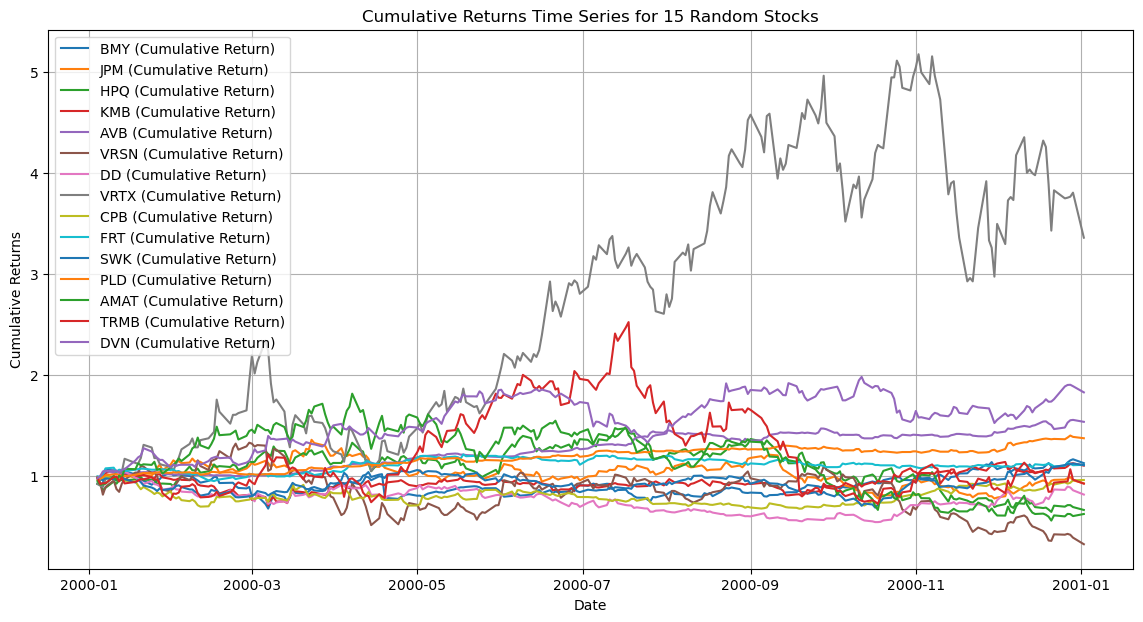

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import random

# Set the random seed for reproducibility
random.seed(1004932043)

# Select 10 random stocks from the portfolio
random_stocks = random.sample(list(data.columns), 15)

# Calculate cumulative returns for the selected stocks
cumulative_returns = (1 + data[random_stocks]).cumprod()

# Plot cumulative returns for the 10 random stocks
plt.figure(figsize=(14, 7))
for stock in random_stocks:
    plt.plot(cumulative_returns.index, cumulative_returns[stock], label=f'{stock} (Cumulative Return)')

plt.title('Cumulative Returns Time Series for 15 Random Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("Cr_TS_252")
plt.show()

# Linear Model

In [79]:
# Calculate mean returns and absolute deviations.
mean_returns = np.mean(returns,axis=0)

abs_dev = np.abs(returns - mean_returns)

In [80]:
import cvxpy as cp
import numpy as np
import time

# Define the weights as decision variables
weights = cp.Variable(returns.shape[1])

# Define the expected returns
expected_returns = mean_returns

# Balancing parameter between returns and risk
alpha = 0.5

# Objective function: Minimise the sum of absolute deviations, maximise returns.
objective = cp.Minimize(alpha * cp.matmul(abs_dev_mean, weights) - (1 - alpha) * cp.matmul(expected_returns, weights))

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1
    weights >= 0,  # Weights must be non-negative
]

# Problem setup
problem = cp.Problem(objective, constraints)

# Solve the problem and measure computational time
start_time = time.time()
problem.solve(solver=cp.SCS)
end_time = time.time()

# Output the optimised weights
lp_optimal_weights = weights.value
print("\nOptimised Weights (non-scientific notation):")

optimised_weight_threshold = 0.0001

# Initialise an empty dictionary
lp_portfolio = {}

# Populate the dictionary with stock and weight pairs
for stock, weight in zip(data.columns, lp_optimal_weights):
    if weight > optimised_weight_threshold:  # Only include stocks with non-zero weight
        lp_portfolio[stock] = weight

# Normalise the filtered weights to sum to 1
total_weight = sum(lp_portfolio.values())
lp_portfolio = {k: v / total_weight for k, v in lp_portfolio.items()}

# Display computational rigour and time taken
computation_time = end_time - start_time
print(f"\nComputational Time: {computation_time:.4f} seconds")
print(f"Solver Status: {problem.status}")

# Filter the weights and corresponding stock names
lp_filtered_weights = [w for w in lp_optimal_weights if w > optimised_weight_threshold]
lp_filtered_names = [data.columns[i] for i in range(len(lp_optimal_weights)) if lp_optimal_weights[i] > optimised_weight_threshold]

# Normalise the filtered weights to sum to 1
total_weight = sum(lp_filtered_weights)
lp_filtered_weights = [w / total_weight for w in lp_filtered_weights]

print(f"\nOptimal Portfolio")
print(f"\n{lp_filtered_names}")
print(lp_filtered_weights)


Optimised Weights (non-scientific notation):

Computational Time: 0.0095 seconds
Solver Status: optimal

Optimal Portfolio

['LH']
[1.0]


In [81]:
np.mean(returns)

0.0011637641228297328

In [82]:
# Filter the weights and corresponding stock names
lp_filtered_weights = [w for w in lp_optimal_weights if w > optimised_weight_threshold]
lp_filtered_names = [data.columns[i] for i in range(len(lp_optimal_weights)) if lp_optimal_weights[i] > optimised_weight_threshold]

# Normalize the filtered weights to sum to 1
total_weight = sum(lp_filtered_weights)
lp_filtered_weights = [w / total_weight for w in lp_filtered_weights]

print(lp_filtered_weights)
print(lp_filtered_names)

[1.0]
['LH']


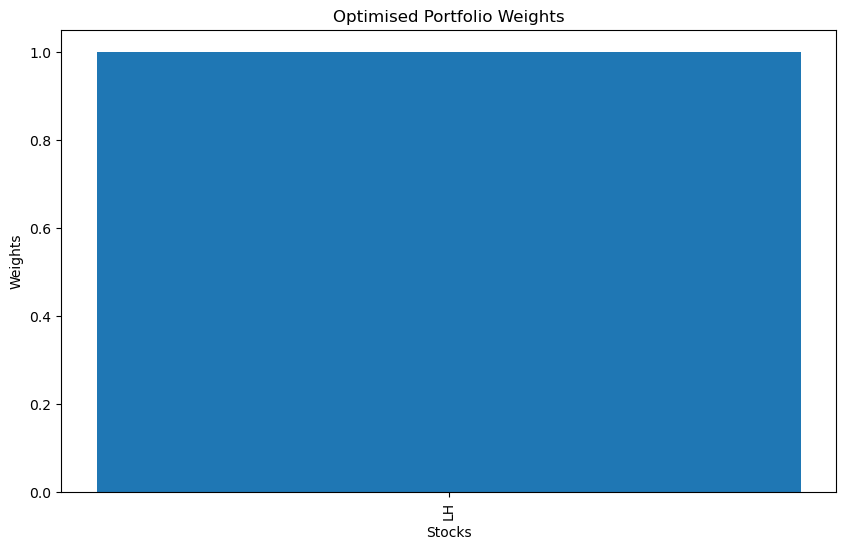

In [83]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(lp_filtered_weights)), lp_filtered_weights)
plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Optimised Portfolio Weights')
plt.xticks(range(len(lp_filtered_weights)), lp_filtered_names, rotation=90)
plt.savefig("LP_250")
plt.show()

## Quadratic  Model

In [84]:
# Calculate the covariance matrix of returns
cov_matrix = np.cov(returns.T)

In [85]:
import cvxpy as cp
import numpy as np
import time

# Define the weights as decision variables
weights = cp.Variable(returns.shape[1])

# Define the expected returns
expected_returns = mean_returns

# Balancing parameter between returns and risk
alpha = 0.5

# Objective function: Minimize portfolio variance and maximize returns
objective = cp.Minimize(alpha * cp.quad_form(weights, cov_matrix) - (1 - alpha) * cp.matmul(expected_returns, weights))

# Constraints
constraints = [
    cp.sum(weights) == 1,  # Sum of weights equals 1
    weights >= 0,  # Weights must be non-negative
]

# Problem setup
problem = cp.Problem(objective, constraints)

# Solve the problem and measure computational time
start_time = time.time()
problem.solve(solver=cp.SCS)
end_time = time.time()

# Output the optimized weights
qp_optimal_weights = weights.value
print("\nOptimised Weights (non-scientific notation):")

optimised_weight_threshold = 0.0001

# Initialize an empty dictionary
qp_portfolio = {}

# Populate the dictionary with stock and weight pairs
for stock, weight in zip(data.columns, qp_optimal_weights):
    if weight > optimised_weight_threshold:  # Only include stocks with non-zero weight
        qp_portfolio[stock] = weight

# Normalize the filtered weights to sum to 1
total_weight = sum(qp_portfolio.values())
qp_portfolio = {k: v / total_weight for k, v in qp_portfolio.items()}


# Display computational rigour and time taken
computation_time = end_time - start_time
print(f"\nComputational Time: {computation_time:.4f} seconds")
print(f"Solver Status: {problem.status}")

# Filter the weights and corresponding stock names
qp_filtered_weights = [w for w in qp_optimal_weights if w > optimised_weight_threshold]
qp_filtered_names = [data.columns[i] for i in range(len(qp_optimal_weights)) if qp_optimal_weights[i] > optimised_weight_threshold]

# Normalize the filtered weights to sum to 1
total_weight = sum(qp_filtered_weights)
qp_filtered_weights = [w / total_weight for w in qp_filtered_weights]

print(f"\nOptimal Portfolio")
print(f"\n{qp_filtered_names}")
print(qp_filtered_weights)


Optimised Weights (non-scientific notation):

Computational Time: 0.2058 seconds
Solver Status: optimal

Optimal Portfolio

['COR', 'DGX', 'EOG', 'LH', 'REGN', 'VRTX']
[0.003908832935986298, 0.37086658579928045, 0.22190208140834905, 0.22333128862929363, 0.09778566859028683, 0.0822055426368036]


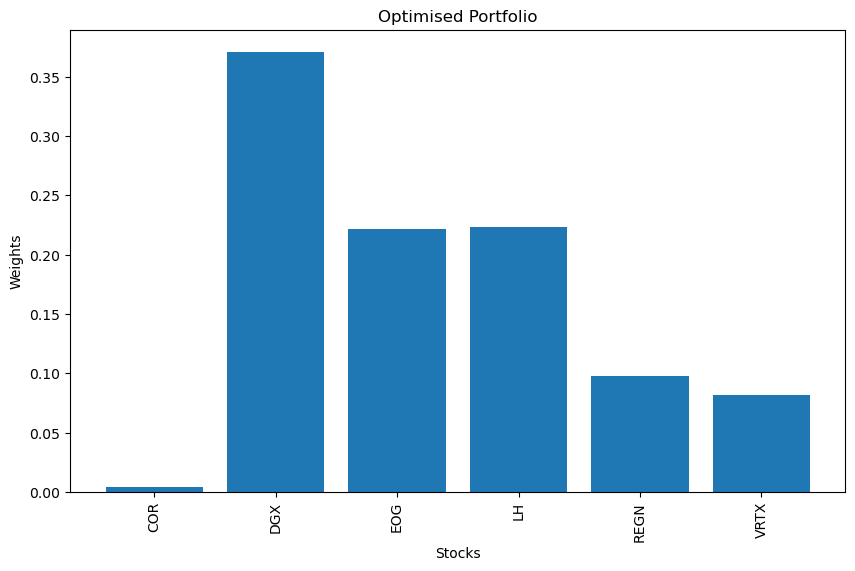

In [86]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(range(len(qp_filtered_weights)), qp_filtered_weights)
plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Optimised Portfolio')
plt.xticks(range(len(qp_filtered_weights)), qp_filtered_names, rotation=90)
plt.savefig("QP_250")
plt.show()

## Time-Series of Both Optimised Portofolios' Cumulative Returns.

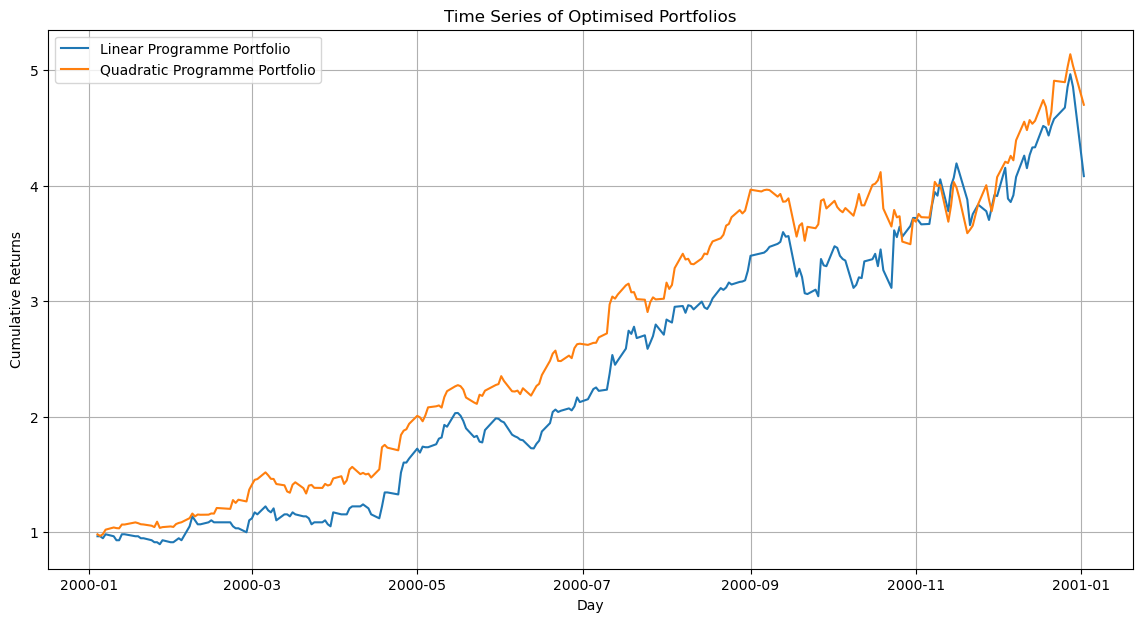

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming lp_optimal_weights and qp_optimal_weights are already calculated as shown in the previous code

# Function to calculate portfolio returns
def calculate_portfolio_returns(weights, returns):
    return returns.dot(weights)

# Calculate portfolio returns
lp_portfolio_returns = calculate_portfolio_returns(lp_optimal_weights, returns)
qp_portfolio_returns = calculate_portfolio_returns(qp_optimal_weights, returns)

# Convert the returns to cumulative returns
lp_cumulative_returns = (1 + lp_portfolio_returns).cumprod()
qp_cumulative_returns = (1 + qp_portfolio_returns).cumprod()

# Plot the time series of both portfolios
plt.figure(figsize=(14, 7))
plt.plot(lp_cumulative_returns.index, lp_cumulative_returns, label='Linear Programme Portfolio')
plt.plot(qp_cumulative_returns.index, qp_cumulative_returns, label='Quadratic Programme Portfolio')
plt.title('Time Series of Optimised Portfolios')
plt.xlabel('Day')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.savefig("TS_CR250")
plt.show()

## Time-Series of Both Optimised Portofolios' Returns.

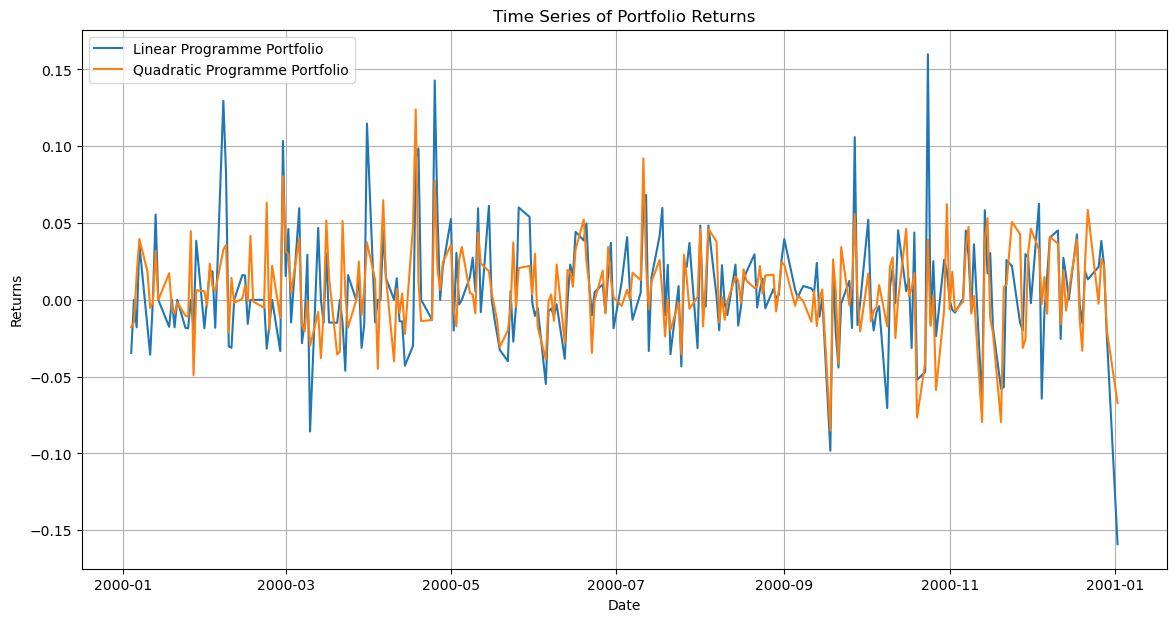

In [88]:
# Plot the returns of both portfolios over time
plt.figure(figsize=(14, 7))
plt.plot(returns.index, lp_portfolio_returns, label='Linear Programme Portfolio')
plt.plot(returns.index, qp_portfolio_returns, label='Quadratic Programme Portfolio')
plt.title('Time Series of Portfolio Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.grid(True)
plt.savefig("TS_R250")
plt.show()

In [89]:
MLR = np.mean(lp_portfolio_returns)
MQR = np.mean(qp_portfolio_returns)

# Format the variances to avoid scientific notation
formatted_MLR = "{:.10f}".format(MLR)
formatted_MQR = "{:.10f}".format(MQR)

print(f"Mean Returns of Linear Portfolio: {formatted_MLR} \nMean Returns of Quadratic Portfolio: {formatted_MQR}")

if MQR > MLR:
    print("The Mean Returns of the Quadratic Portfolio are greater than the Linear Portfolio")
elif MLR > MQR:
    print("The Mean Returns of the Linear Portfolio are greater than the Quadratic Portfolio")
elif MLR == MQR:
    print("The Mean Returns of both Portfolios are identical")    

Mean Returns of Linear Portfolio: 0.0062609940 
Mean Returns of Quadratic Portfolio: 0.0065534292
The Mean Returns of the Quadratic Portfolio are greater than the Linear Portfolio


In [90]:
LPVAR = np.var(lp_portfolio_returns)
QPVAR = np.var(qp_portfolio_returns)

# Format the variances to avoid scientific notation
formatted_LPVAR = "{:.10f}".format(LPVAR)
formatted_QPVAR = "{:.10f}".format(QPVAR)

print(f"Variance of Linear Portfolio Returns: {formatted_LPVAR}")
print(f"Variance of Quadratic Portfolio Returns: {formatted_QPVAR}")

if QPVAR > LPVAR:
    print("The Variance of the Quadratic Portfolio is greater than the Linear Portfolio")
elif LPVAR > QPVAR:
    print("The Variance of the Linear Portfolio is greater than the Quadratic Portfolio")
elif MLR == MQR:
    print("The Variances of both Portfolios are identical")  

Variance of Linear Portfolio Returns: 0.0013435833
Variance of Quadratic Portfolio Returns: 0.0007906438
The Variance of the Linear Portfolio is greater than the Quadratic Portfolio
